<a href="https://colab.research.google.com/github/Nobu-T/Tellus/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tellusxdp.github.io/start-python-with-tellus/lesson8.html

In [1]:
# 各種インポート
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tokyo_tower = cv2.imread('tokyo_tower.png')
print(type(tokyo_tower))

<class 'numpy.ndarray'>


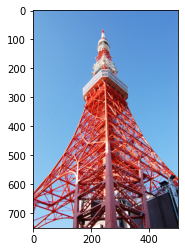

In [5]:
rgb_tower = cv2.cvtColor(tokyo_tower, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_tower)

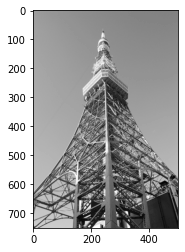

In [8]:
gray_tower = cv2.imread('tokyo_tower.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_tower, cmap='gray')

In [11]:
cv2.imwrite('tokyo_tower_gray.png', gray_tower)

True

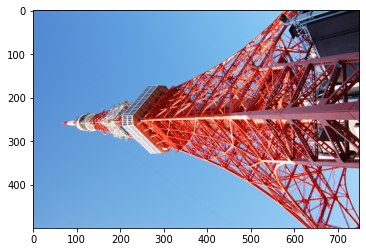

In [14]:
# 元の画像サイズを取得
h, w, c = tokyo_tower.shape

# ①125だけ左に移動、表示領域を(750, 750)=(h, h)に広げる
M1 = np.float32([[1, 0, 125], [0, 1, 0]])
tokyo_tower_tr1 = cv2.warpAffine(tokyo_tower, M1, (h, h))

# ②中心点は(375, 375)=(w/2+125, h/2)で、反時計回りに90度回転
M2 = cv2.getRotationMatrix2D((w/2+125, h/2), 90, 1)
# 出力画像サイズは(750, 750)=(h, h)
tokyo_tower_tr2 = cv2.warpAffine(tokyo_tower_tr1, M2, (h, h))

# ③上に125（縦方向に-125）移動。表示領域を(750,500)=(h, w)にする
M3 = np.float32([[1, 0, 0], [0, 1, -125]])
tokyo_tower_tr3 = cv2.warpAffine(tokyo_tower_tr2, M3, (h, w))

# 平行移動と回転をさせた画像を表示
plt.imshow(cv2.cvtColor(tokyo_tower_tr3, cv2.COLOR_BGR2RGB))

In [16]:
import os
import glob
files = glob.glob('./*.JPG')
files

['./fish3.JPG', './fish1.JPG', './fish2.JPG']

In [17]:
M = np.float32([[0.5, 0, 0], [0, 0.5, 0]])

# 半分のサイズにリサイズし、ファイル名にhalfを付けて保存する
for f in files:
    # 画像の読込
    img = cv2.imread(f)
    # 形状を取得
    h, w, c = img.shape

    # 変換行列の適用
    img_resized = cv2.warpAffine(img, M, (w//2, h//2))

    # ファイル名と拡張子の分離
    title, ext = os.path.splitext(f)

    # ファイル名にhalfを付けて保存
    cv2.imwrite(title + '_half' + ext, img_resized)

1067
800
3


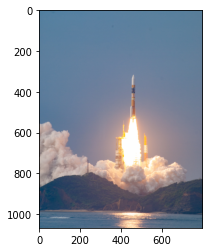

In [18]:
# 画像の読み込み
rocket_org = cv2.imread('H2A.jpg')

# 画像の表示
plt.imshow(cv2.cvtColor(rocket_org, cv2.COLOR_BGR2RGB))
rocket_org_height, rocket_org_width, rocket_org_colornum = rocket_org.shape
print(rocket_org_height)
print(rocket_org_width)
print(rocket_org_colornum)

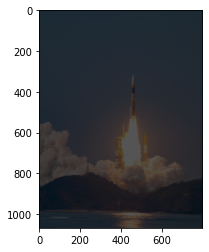

In [19]:
rocket_half = rocket_org // 3
plt.imshow(cv2.cvtColor(rocket_half, cv2.COLOR_BGR2RGB))

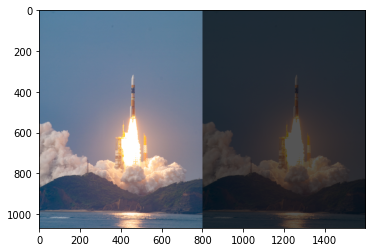

In [21]:
# 画像を縦に連結
rocket_hconcat = cv2.hconcat([rocket_org, rocket_half])

# 画像の表示
plt.imshow(cv2.cvtColor(rocket_hconcat, cv2.COLOR_BGR2RGB))

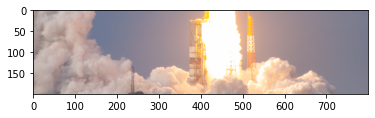

In [22]:
# 画像を縦200pxずつに区切った画像（800pxまでの4枚分）へ分割
rocket_crop_list = []
for i in range(4):
    rocket_crop = rocket_org[200*i:200*(i+1), :, :]
    rocket_crop_list.append(rocket_crop)

# 下端の画像のみ表示
plt.imshow(cv2.cvtColor(rocket_crop_list[3], cv2.COLOR_BGR2RGB))

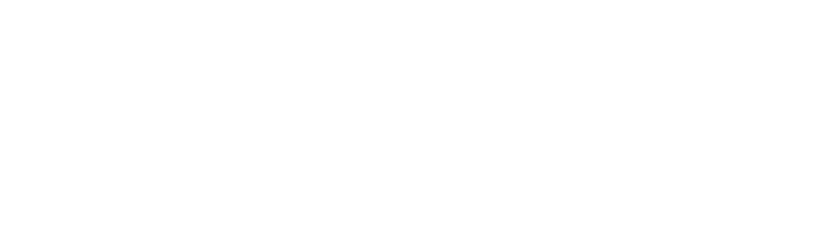

In [23]:
import matplotlib.animation as animation
# 画像に関する事前設定
fig = plt.figure(figsize=(4,1), dpi=200)  # これで横800px, 縦200pxのGIF画像になる
ax = fig.add_axes([0, 0, 1, 1])  # 余白なしにする
ax.axis('off')  # グラフの軸やタイトルといった要素を非表示にする

# 4分割にした画像それぞれをRGB形式にして新しいリスト（rocket_crop_gif_list）に入れる
rocket_crop_gif_list = []
for i in range(4):
    rocket_crop_gif = ax.imshow(cv2.cvtColor(rocket_crop_list[i], cv2.COLOR_BGR2RGB))
    rocket_crop_gif_list.append([rocket_crop_gif])

# アニメーションの作成
anim = animation.ArtistAnimation(fig, rocket_crop_gif_list, interval=500, repeat_delay=500)

# GIF画像として保存（内部的にPillowの機能を使うようwriterで設定）
anim.save('rocket_anim.gif', writer='pillow')

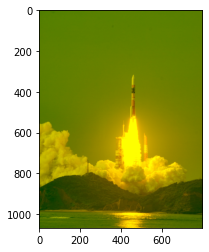

In [24]:
rocket_gr = np.zeros((rocket_org_height, rocket_org_width, 3), dtype=np.uint8)
rocket_gr[:, :, 1] = rocket_org[:, :, 1]
rocket_gr[:, :, 2] = rocket_org[:, :, 2]
plt.imshow(cv2.cvtColor(rocket_gr, cv2.COLOR_BGR2RGB))

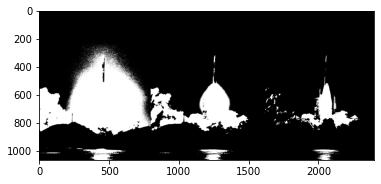

In [26]:
# 色の強さ 128 を基準とした2値化
rocket_gr = cv2.imread('H2A.jpg', cv2.IMREAD_GRAYSCALE)
rocket_wb1 = rocket_gr // 128
# 色の強さ 160 を基準とした二値化
rocket_wb2 = rocket_gr // 160
# 色の強さ 192 を基準とした二値化
rocket_wb3 = rocket_gr // 192
# 二値化した画像を横に並べて表示
rocket_wbs = cv2.hconcat([rocket_wb1, rocket_wb2, rocket_wb3])
plt.imshow(rocket_wbs, cmap="gray")

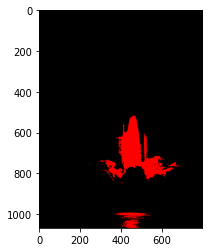

In [28]:
# 赤のみの単色化
rocket_r = np.zeros((rocket_org_height, rocket_org_width, 3), dtype=np.uint8)
rocket_r[:, :, 2] = rocket_org[:, :, 2]

# 赤のみの画像データの元（rocket_r）を変更しないよう、複製物の作成
rocket_r_trimmed = np.copy(rocket_r)

# 赤の色について、色の強さ 240 を基準とした二値化
rocket_r_wb = rocket_r_trimmed[:, :, 2] // 240

# 赤のみの画像データと二値化したデータのかけ算
rocket_r_trimmed[:, :, 2] *= rocket_r_wb

# 赤の強さ 240 以上のみのピクセルを残した画像データの表示
plt.imshow(cv2.cvtColor(rocket_r_trimmed, cv2.COLOR_BGR2RGB))

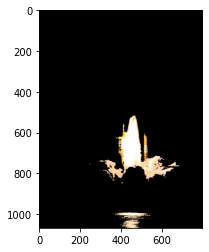

In [30]:
# マスキング用のデータ（すべて0で初期化）
rocket_trimmed_img = np.zeros((rocket_org_height, rocket_org_width, 3), dtype=np.uint8)

# BGRすべてで、2値化されたものを「0」と「255」に変換したもの
for i in range(3):
    rocket_trimmed_img[:, :, i] = rocket_r_wb * 255

# マスク画像を表示
plt.imshow(cv2.cvtColor(rocket_trimmed_img, cv2.COLOR_BGR2RGB))

# マスク処理を実行して結果を表示
rocket_masked = cv2.bitwise_and(rocket_org, rocket_trimmed_img)
plt.imshow(cv2.cvtColor(rocket_masked, cv2.COLOR_BGR2RGB))

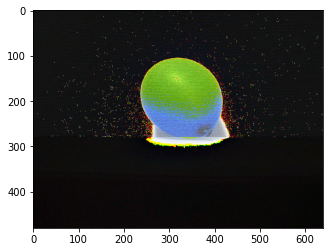

In [35]:
# home1.png画像の読み込み
im1 = cv2.imread('home1.png')
im2 = cv2.imread('home2.png')

# 画像の表示
plt.imshow(cv2.cvtColor((im2- im1), cv2.COLOR_BGR2RGB))

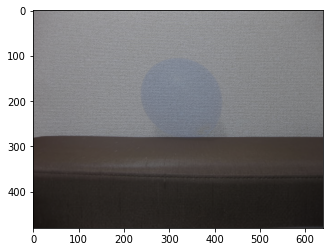

In [37]:
# addWeighted()を利用して重ね合わせる
im3 = cv2.addWeighted(im1, 0.7, im2, 0.1, 0)

# 重ね合わせた画像の表示
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))

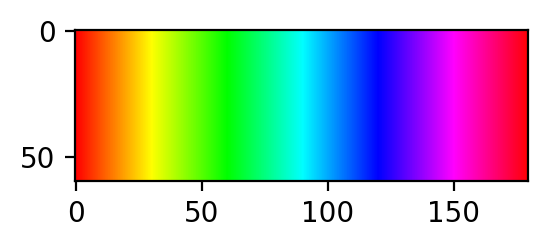

In [38]:
# H（色相）の値と色の関係をグラフに表示
h_map = np.zeros((60 , 180, 3), dtype=np.uint8)

# H（色相）は0から179までの連続する整数にする
for i in range(180):
    h_map[:, i, 0] = i

# S（彩度）はすべて255にする
h_map[:, :, 1] = 255

# V（明度）はすべて255にする
h_map[:, :, 2] = 255

h_map = cv2.cvtColor(h_map, cv2.COLOR_HSV2BGR)

fig = plt.figure(figsize=(3,1), dpi=200)  # グラフの領域：横600px, 縦200px
plt.imshow(cv2.cvtColor(h_map, cv2.COLOR_BGR2RGB))

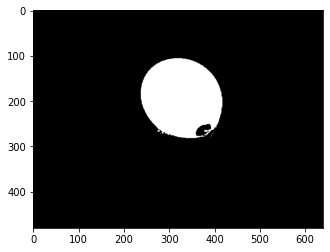

In [39]:
# home2.png画像の読み込み
im2 = cv2.imread('home2.png')

# HSV形式に変換
im2_hsv = cv2.cvtColor(im2, cv2.COLOR_BGR2HSV)
im2_width, im2_height, im2_col = im2_hsv.shape

# H,S,Vそれぞれの下限値と上限値
lower_blue = np.array([90, 100, 100])
upper_blue = np.array([130, 255, 255])

# 各ピクセルが上限値と下限値の間に入るかどうかで2値化する
im2_mask = cv2.inRange(im2_hsv, lower_blue, upper_blue)

# マスキング用のデータ（すべて0で初期化）
im2_mask_img = np.zeros((im2_width, im2_height, 3), dtype=np.uint8)

# BGRすべてで2値化
for i in range(3):
    im2_mask_img[:, :, i] = im2_mask

# 2値化した画像の表示
plt.imshow(cv2.cvtColor(im2_mask_img, cv2.COLOR_BGR2RGB))

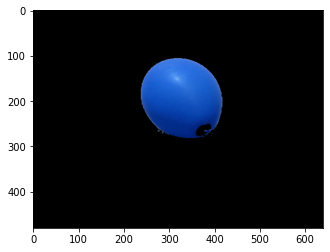

In [40]:
# im2の画像と2値化した画像でマスキング
im2_masked = cv2.bitwise_and(im2, im2_mask_img)

# マスキングした画像の表示
plt.imshow(cv2.cvtColor(im2_masked, cv2.COLOR_BGR2RGB))


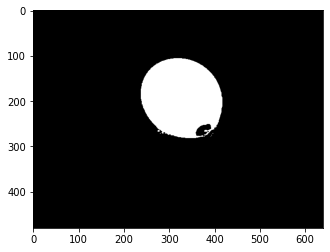

In [41]:
# 画像から輪郭になるものを抽出
im2_masked_gray = cv2.cvtColor(im2_masked, cv2.COLOR_BGR2GRAY)
ret, im2_masked_gray = cv2.threshold(im2_masked_gray, 0, 255, cv2.THRESH_BINARY)
plt.imshow(im2_masked_gray, cmap="gray")

In [42]:
contours, hierarchy = cv2.findContours(im2_masked_gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

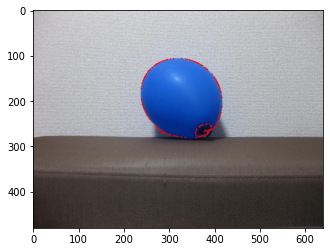

In [43]:
# 元画像のコピーを作成
im2_draw_line = np.copy(im2)

# ゴミのデータも混じっているのでループにして選別
for i in range(len(contours)):
    # 面積が大きくないものはゴミのデータとして無視する
    contour = contours[i]
    c_area = cv2.contourArea(contour)
    if c_area < 1000:
        continue

    # 風船を長方形で囲む
    cv2.polylines(im2_draw_line, contours[i], True, (0, 0, 255), 2)

# 輪郭線の入った画像を表示
plt.imshow(cv2.cvtColor(im2_draw_line, cv2.COLOR_BGR2RGB))


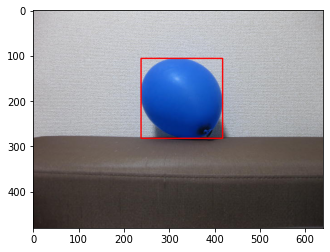

In [44]:
# 元画像のコピーを作成
im2_draw_rect = np.copy(im2)

# 画像から輪郭になるものを抽出
im2_masked_gray = cv2.cvtColor(im2_masked, cv2.COLOR_BGR2GRAY)
ret, im2_masked_gray = cv2.threshold(im2_masked_gray, 0, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(im2_masked_gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# ゴミのデータも混じっているのでループにして選別
for i in range(len(contours)):
    # 面積が大きくないものはゴミのデータとして無視する
    contour = contours[i]
    c_area = cv2.contourArea(contour)
    if c_area < 1000:
        continue

    # 風船の左上の座標と幅・高さの情報を取得
    x, y, w, h = cv2.boundingRect(contour)

    # 風船を長方形で囲む
    cv2.rectangle(im2_draw_rect,(x, y), (x + w, y + h), (0, 0, 255), 2)

# 囲った線の入った画像を表示
plt.imshow(cv2.cvtColor(im2_draw_rect, cv2.COLOR_BGR2RGB))

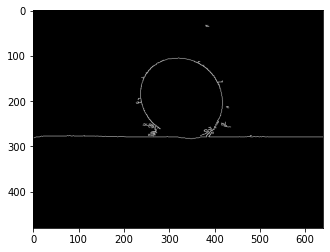

In [45]:
# Canny()を使ってim2から風船と椅子のエッジを検出
im2_edged = cv2.Canny(im2, 100, 330)

# 検出したエッジの画像を表示
plt.imshow(im2_edged, cmap="gray")

480
640
3


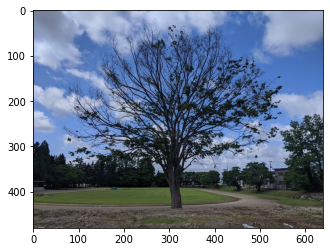

In [47]:
# tree.jpg画像の読み込み
tree = cv2.imread('tree.jpg')
# 画像の表示
plt.imshow(cv2.cvtColor(tree, cv2.COLOR_BGR2RGB))
tree_height, tree_width, tree_colornum = tree.shape
print(tree_height)
print(tree_width)
print(tree_colornum)

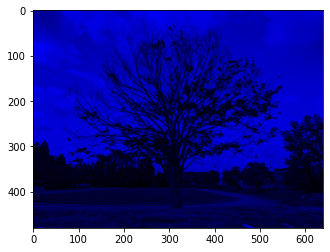

In [48]:
# 青のみの単色化
tree_b = np.zeros((tree_height, tree_width, 3), dtype=np.uint8)
tree_b[:, :, 0] = tree[:, :, 0]
plt.imshow(cv2.cvtColor(tree_b, cv2.COLOR_BGR2RGB))

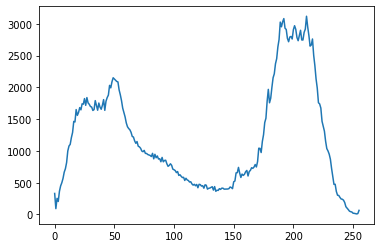

In [49]:
# cv2のcalcHist()を使って青の成分のヒストグラムを計算・表示
tree_hist = cv2.calcHist([tree],[0],None,[256],[0,256])
plt.plot(tree_hist)

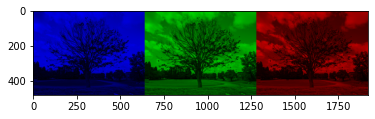

In [50]:
# 青のみの単色化
tree_b = np.zeros((tree_height, tree_width, 3), dtype=np.uint8)
tree_b[:, :, 0] = tree[:, :, 0]

# 緑のみの単色化
tree_g = np.zeros((tree_height, tree_width, 3), dtype=np.uint8)
tree_g[:, :, 1] = tree[:, :, 1]

# 赤のみの単色化
tree_r = np.zeros((tree_height, tree_width, 3), dtype=np.uint8)
tree_r[:, :, 2] = tree[:, :, 2]

# 単色化した画像を横に並べて表示
tree_monos = cv2.hconcat([tree_b, tree_g, tree_r])
plt.imshow(cv2.cvtColor(tree_monos, cv2.COLOR_BGR2RGB))


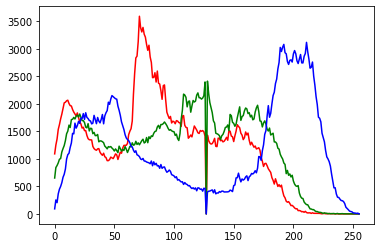

In [51]:
# RGB(赤緑青)のヒストグラムを重ねて表示

# 赤の成分
tree_hist = cv2.calcHist([tree],[2],None,[256],[1,255])
plt.plot(tree_hist, color="red")

# 緑の成分
tree_hist = cv2.calcHist([tree],[1],None,[256],[1,255])
plt.plot(tree_hist, color="green")

# 青の成分
tree_hist = cv2.calcHist([tree],[0],None,[256],[1,255])
plt.plot(tree_hist, color="blue")

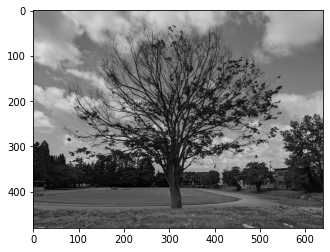

In [52]:
# 木の画像をグレースケール化する
tree_gray = cv2.cvtColor(tree, cv2.COLOR_BGR2GRAY)
plt.imshow(tree_gray, cmap='gray')

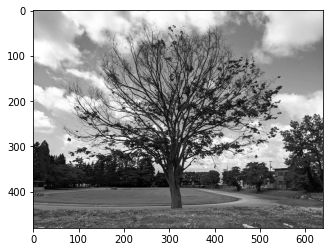

In [54]:
# equalizeHist()を使ってヒストグラムを平坦化して表示
tree_equalized = cv2.equalizeHist(tree_gray)
plt.imshow(tree_equalized, cmap="gray")

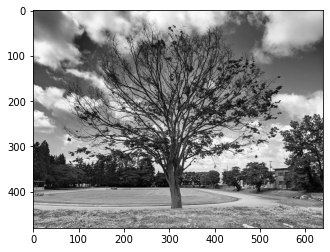

In [55]:
# CLAHE（適用的ヒストグラム平坦化）を使ってヒストグラムを平坦化して表示
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3, 3))
tree_clahe = clahe.apply(tree_gray)
plt.imshow(tree_clahe, cmap="gray")